In [1]:
import os 
import sys 
import matplotlib.pyplot as plt 

notebook_dir = "/Users/sergio/Documents/vo/notebooks"
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
from utils.dataset import load_dataset
from utils.general_utils import load_config
from utils.camera_utils import Camera
from utils.vo_utils import getProjectionMatrix2

/Users/sergio/anaconda3/envs/visual_odometry/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### load dataset 

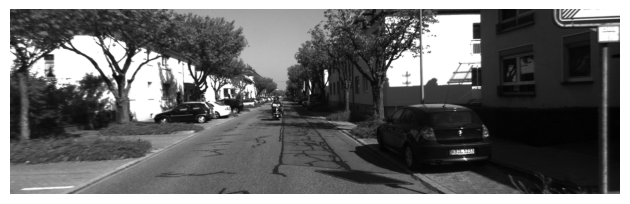

In [2]:
config = load_config("/Users/sergio/Documents/vo/configs/kitti_config.yaml")
dataset = load_dataset(config=config)
dataset.device = "cpu"

image, pose = dataset[0]
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

### cameras

In [3]:
projection_matrix = getProjectionMatrix2(
    znear=0.01,
    zfar=100.0,
    fx=dataset.fx,
    fy=dataset.fy,
    cx=dataset.cx,
    cy=dataset.cy,
    W=dataset.width,
    H=dataset.height,
).transpose(0, 1)
viewpoint = Camera.init_from_dataset(dataset=dataset, idx=0, projection_matrix=projection_matrix)

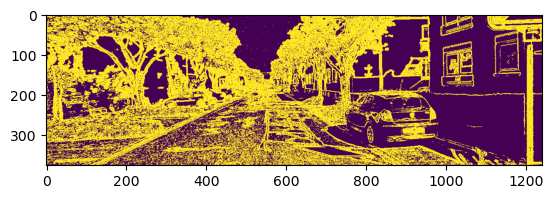

In [4]:
# ---> grad mask 
viewpoint.compute_grad_mask(config=config)
plt.imshow(viewpoint.grad_mask.squeeze())
plt.show()